In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt

### Learning Data Viz techniques from an online class

In [2]:
df = pd.read_csv("titanic.csv")
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df["survived"].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [4]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(3), int64(4), object(7)
memory usage: 143.3+ KB


<AxesSubplot:>

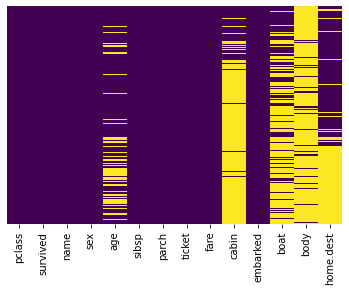

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar= False, cmap ='viridis' )

- Most of the missing is in the age, cabin, boat, body and home.dest column

<AxesSubplot:xlabel='survived', ylabel='count'>

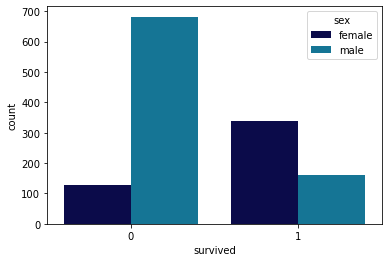

In [7]:
sns.countplot(x=df["survived"], hue= df["sex"], palette = "ocean")

- We can observe that the more number of female have survived than males.
- Also, among the deceased, there were more men than women.

<AxesSubplot:xlabel='survived', ylabel='count'>

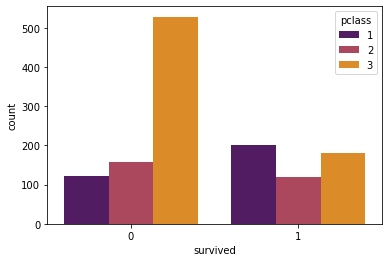

In [8]:
sns.countplot(x=df["survived"], hue= df["pclass"], palette = "inferno")

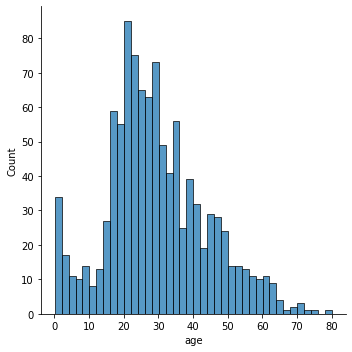

In [9]:
sns.displot(x = df["age"].dropna(), kde = False, bins =40)

- We see that the age ranges from 0 to 80, with most of them belonging to the age group 20-50.
- The maximum number of people belong to the age group of 25 to 30.

In [10]:
df["age_category"] = pd.cut(
    df.age, 
    bins = [0,10,20,30,40,50,60,70,80], 
    labels = ["kids", "teenager", "young", "middle_aged", "upper middle", "old", "very_old", "senior"], ordered= True)

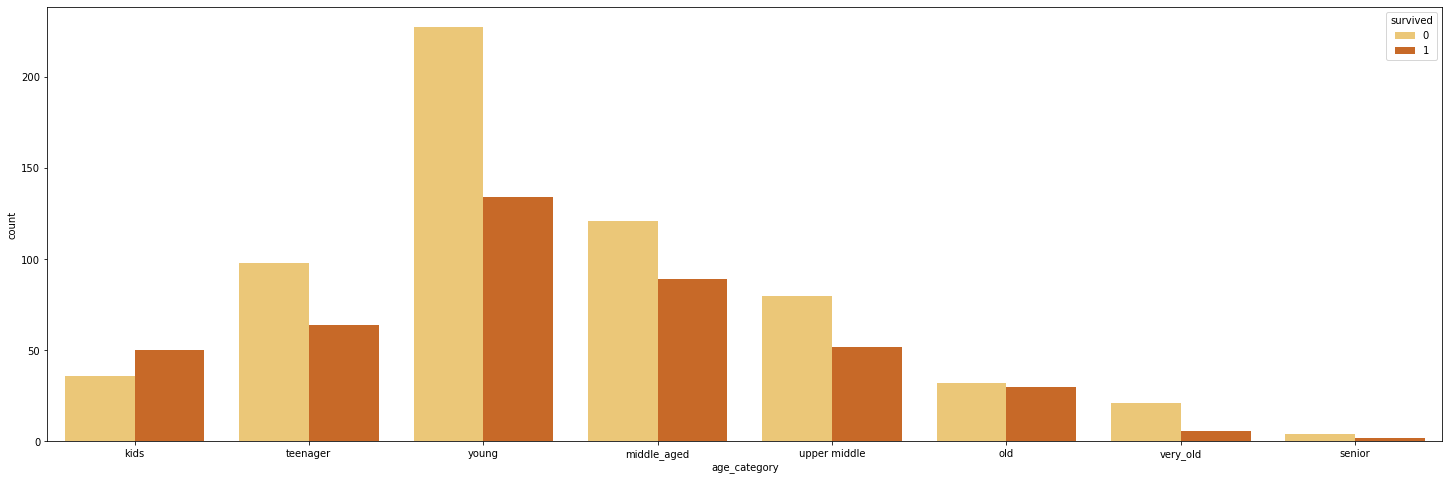

In [12]:
plt.figure(figsize = (25,8))
ax = sns.countplot(x=df["age_category"], data=df, hue= "survived", palette = "YlOrBr")


- We observe that the majority of the people who did not survive are between the age group 20 to 30 followed by people in the age group 30-40. However, these are the counts and not percentages or proportions

#### Considering the proportions of people belonging to different age groups who survived 

In [13]:
temp_df = df.groupby("age_category")["survived"].sum().reset_index()

In [16]:
temp_df2 = df.groupby("age_category").size().reset_index()


In [17]:
final_temp = pd.merge(
    temp_df, 
    temp_df2, 
    on = "age_category",
    how= 'inner'
)

In [18]:
#final_temp['prop_survived'] = final_temp["survived"]/ final_temp[0]
#final_temp

In [19]:
#temp = df.groupby("survived")["age_category"].value_counts()

In [20]:
final_temp = final_temp.melt(id_vars = "age_category")

<AxesSubplot:xlabel='age_category', ylabel='value'>

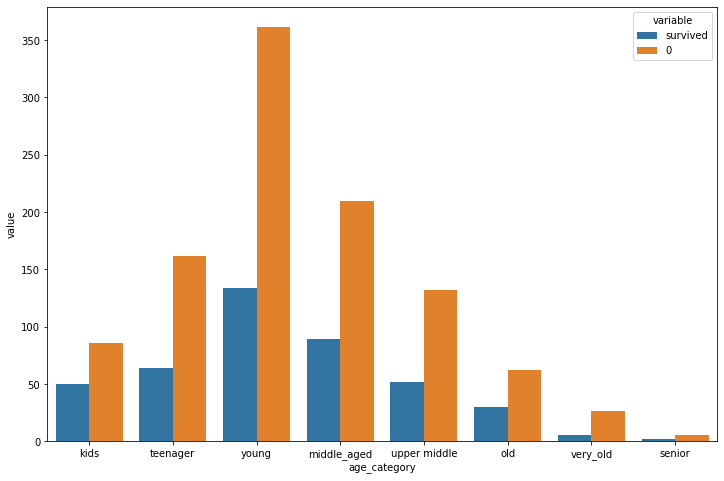

In [21]:
plt.figure(figsize =(12,8))
sns.barplot(data = final_temp, x="age_category",y="value", hue="variable")

- This shows that maximum number of people in the ship belonged to the young catgeory and most of the people who survived alo belong to the same category, but the survived people do not account not even 50% of the total in that group.
- More than half of the kids have survived. 
- Very few people belonging to the very_old category have survived.
- Rest all categories approximately half of them were rescued.


### Analyzing Fare

<AxesSubplot:>

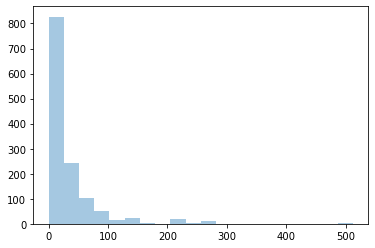

In [26]:
sns.distplot(x = df["fare"].dropna(), kde = False, bins = 20)

In [36]:
temp_df_p_class = df.groupby("pclass")["survived"].sum().reset_index()

In [39]:
temp_p_class_total = df.groupby("pclass").size().reset_index()

In [40]:
final_temp_p_class = pd.merge(
    temp_df_p_class, 
    temp_p_class_total, 
    on = "pclass",
    how= 'inner'
)

In [41]:
final_temp_p_class

,pclass,survived,0
0,1,200,323
1,2,119,277
2,3,181,709


In [43]:
final_temp_p_class = final_temp_p_class.melt(id_vars = "pclass")

<AxesSubplot:xlabel='pclass', ylabel='value'>

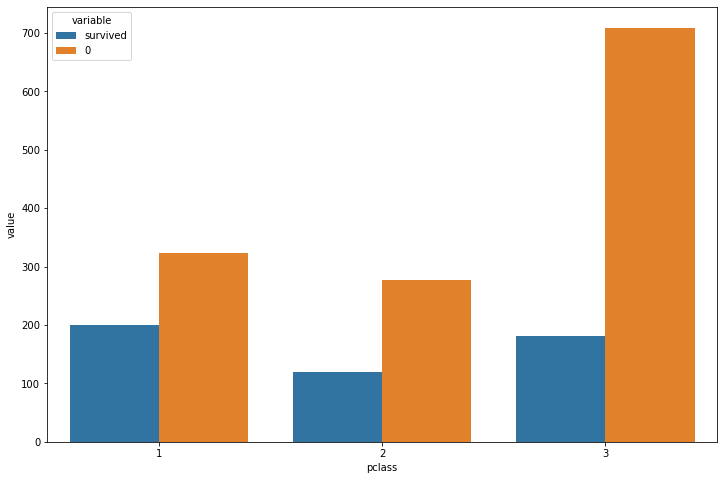

In [44]:
plt.figure(figsize =(12,8))
sns.barplot(data = final_temp_p_class, x="pclass",y="value", hue="variable")

- We can observe that most of the people belonging to the class 1 have been recused
- 50% of the people belonging to the class 2 have survived
- Most of the people belonging to the class 3 have not been able to survive.

### Age vs pclass

<AxesSubplot:xlabel='pclass', ylabel='age'>

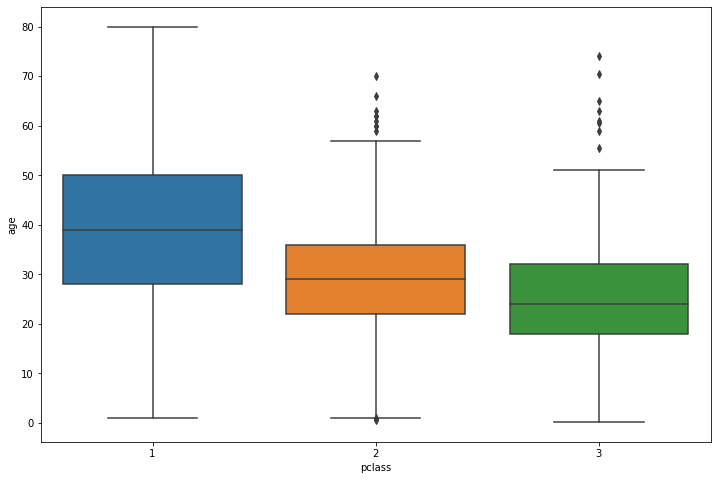

In [47]:
plt.figure(figsize=(12,8))
sns.boxplot(x = "pclass", y="age", data = df)

- Most of the people belonging to the class 1 are from 30 to 50 year of age, however total range is wider than other two classes.
- The median age of people belonging to class 3 is less than that of class 2
- There are many outliers for the class 2 and class 3